<a href="https://colab.research.google.com/github/gsb3501/2023bigdatamarketing/blob/main/20230830_ML_regressionfinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from google.colab import drive

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Ashopping.csv")

In [ ]:
df.columns

Index(['고객ID', '이탈여부', '총매출액', '구매금액대', '방문빈도', '1회 평균매출액', '할인권 사용 횟수',
       '총 할인 금액', '고객등급', '구매유형', '클레임접수여부', '구매카테고리수', '거주지역', '성별', '고객 나이대',
       '거래기간', '할인민감여부', 'Recency', 'Frequency', 'Monetary', '평균 구매주기'],
      dtype='object')

In [ ]:
df.head()

,고객ID,이탈여부,총매출액,구매금액대,방문빈도,1회 평균매출액,할인권 사용 횟수,총 할인 금액,고객등급,구매유형,...,구매카테고리수,거주지역,성별,고객 나이대,거래기간,할인민감여부,Recency,Frequency,Monetary,평균 구매주기
0,1,1,4963160,1,22,225598,1,5445,1,3,...,7,6,1,6,3303,0,3,2,1,149.136364
1,2,1,2271520,0,38,59777,22,350995,1,1,...,5,4,0,2,3129,0,5,3,4,81.342105
2,3,1,2484250,0,2,1242125,6,186045,1,2,...,4,6,0,3,3636,0,4,1,4,1817.000000
3,4,1,2778850,0,9,308761,1,5195,2,4,...,4,5,0,4,3637,0,7,4,6,403.111111
4,5,1,4437610,1,10,443761,9,246350,2,4,...,6,6,0,4,3638,0,5,1,4,362.800000


## 회귀모형

모델 평가시 R2이 1에 가깝고, RMSE 가 0에 가까운 것 선택하면 됨

In [ ]:
from matplotlib import rc, font_manager
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df['평균 구매주기']

0       149.136364
1        81.342105
2      1817.000000
3       403.111111
4       362.800000
          ...     
995     131.257143
996     770.666667
997     355.230769
998     138.535714
999     131.375000
Name: 평균 구매주기, Length: 1000, dtype: float64

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 16 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (25.3 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120831 files and direc

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

<ipython-input-10-a7182ee1a0d0>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['평균 구매주기'])


<Axes: xlabel='평균 구매주기', ylabel='Density'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  func(*a

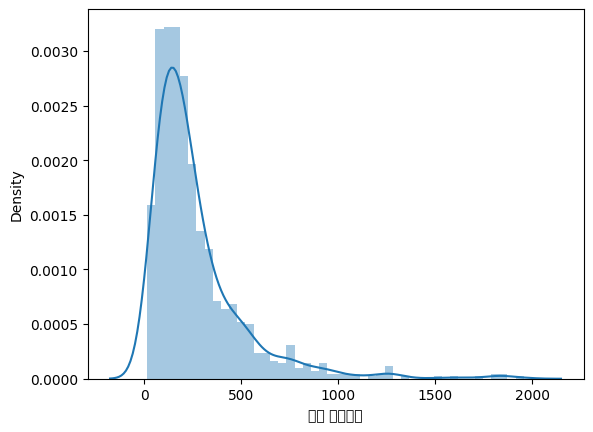

In [ ]:
sns.distplot(df['평균 구매주기'])

<ipython-input-11-5ad833af0927>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['평균 구매주기'])


<Axes: xlabel='평균 구매주기', ylabel='Density'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  func(*a

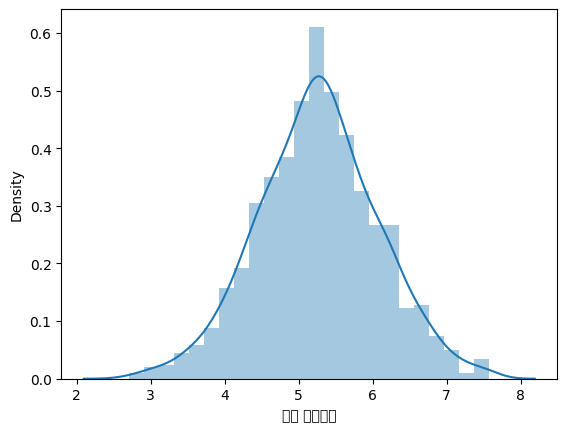

In [ ]:
df['평균 구매주기'] = np.log1p(df['평균 구매주기']) #이걸 왜 했냐
# x가 y랑 대응이 되는데, y의 분포가 치우쳐져있다면 x가 대응될 때 채우쳐진 쪽으로 대응될 확률이 더 많다.
# 그러면 베타값이 왜곡될 수 있음. 따라서 y의 분포를 고르게 만들어줬다.
sns.distplot(df['평균 구매주기'])

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
df.columns

Index(['고객ID', '이탈여부', '총매출액', '구매금액대', '방문빈도', '1회 평균매출액', '할인권 사용 횟수',
       '총 할인 금액', '고객등급', '구매유형', '클레임접수여부', '구매카테고리수', '거주지역', '성별', '고객 나이대',
       '거래기간', '할인민감여부', 'Recency', 'Frequency', 'Monetary', '평균 구매주기'],
      dtype='object')

In [ ]:
num = ['총매출액', '1회 평균매출액', '할인권 사용 횟수', '총 할인 금액']
cg = ['구매금액대', '고객등급' ] #집단변수

In [ ]:
X = df[df['이탈여부'] == 0][num+cg] #이탈하지 않은 고객의 num, cg 독립변수와 구매주기라는 종속변수를 만들고 싶어서 이탈여부 = 0인 경우
X.head()

,총매출액,1회 평균매출액,할인권 사용 횟수,총 할인 금액,구매금액대,고객등급
300,4817810,267656,30,380000,1,1
301,2329590,129422,10,305145,0,1
302,3530500,294208,26,366595,0,2
303,20500350,280827,27,357145,2,2
304,9328620,227527,29,374050,2,2


In [ ]:
X

,총매출액,1회 평균매출액,할인권 사용 횟수,총 할인 금액,구매금액대,고객등급
300,4817810,267656,30,380000,1,1
301,2329590,129422,10,305145,0,1
302,3530500,294208,26,366595,0,2
303,20500350,280827,27,357145,2,2
304,9328620,227527,29,374050,2,2
...,...,...,...,...,...,...
995,12731560,363759,3,44445,2,2
996,3419010,569835,6,186545,0,1
997,4612100,354777,8,260700,1,2
998,5165360,184477,20,347700,1,1


In [ ]:
Y = df[df['이탈여부'] == 0]['평균 구매주기']
Y.head()

300    4.706523
301    4.977500
302    5.793014
303    3.987715
304    4.523643
Name: 평균 구매주기, dtype: float64

In [ ]:
Y

300    4.706523
301    4.977500
302    5.793014
303    3.987715
304    4.523643
         ...   
995    4.884748
996    6.648553
997    5.875579
998    4.938321
999    4.885639
Name: 평균 구매주기, Length: 700, dtype: float64

In [ ]:
X.corr() #상관관계 확인

,총매출액,1회 평균매출액,할인권 사용 횟수,총 할인 금액,구매금액대,고객등급
총매출액,1.000000,0.384479,0.030876,0.016205,0.664404,0.406895
1회 평균매출액,0.384479,1.000000,0.039768,0.043186,0.372449,0.244133
할인권 사용 횟수,0.030876,0.039768,1.000000,0.851112,0.006481,-0.035865
총 할인 금액,0.016205,0.043186,0.851112,1.000000,0.012578,-0.017106
구매금액대,0.664404,0.372449,0.006481,0.012578,1.000000,0.673577
고객등급,0.406895,0.244133,-0.035865,-0.017106,0.673577,1.000000


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)
print(X_train)
print(X_test)
print(Y_train)
print(Y_test)

         총매출액  1회 평균매출액  할인권 사용 횟수  총 할인 금액  구매금액대  고객등급
306   3763020    163610         22   350995      0     1
775   2684970     70657          1     6900      0     1
371   4758980    206912          5   131595      1     2
817  13541940    131475          5   150235      2     2
708  28033570    572114         10   304895      2     2
..        ...       ...        ...      ...    ...   ...
659   2925260     57358         15   325600      0     2
492   3678160    282935         19   366100      0     1
929   4483200    166044         17   365645      1     1
859  17322270    721761         24   359250      2     2
984   3868900    214939         19   365350      0     2

[490 rows x 6 columns]
         총매출액  1회 평균매출액  할인권 사용 횟수  총 할인 금액  구매금액대  고객등급
606   3096770    309677          1     5195      0     1
904   2345400    137965         24   359500      0     1
340   2827940    157108          9   247545      0     1
793  10197480   1274685          6   185850      2     2
314   3

In [ ]:
# 표준화, 원핫인코딩 : 컬럼트랜스포머

ct = ColumnTransformer([('scaling', StandardScaler(), num),('onehot', OneHotEncoder(sparse = False), cg)])
#X, 즉 num과 cg에 스케일링과 원핫인코딩을 적용한다는 뜻
#원핫인코딩 : 파이썬이 집단변수를 인식하게 만드는 방법
ct

ColumnTransformer(transformers=[('scaling', StandardScaler(),
                                 ['총매출액', '1회 평균매출액', '할인권 사용 횟수', '총 할인 금액']),
                                ('onehot', OneHotEncoder(sparse=False),
                                 ['구매금액대', '고객등급'])])

In [ ]:
ct.fit(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


ColumnTransformer(transformers=[('scaling', StandardScaler(),
                                 ['총매출액', '1회 평균매출액', '할인권 사용 횟수', '총 할인 금액']),
                                ('onehot', OneHotEncoder(sparse=False),
                                 ['구매금액대', '고객등급'])])

In [ ]:
X_train= ct.transform(X_train)
X_test= ct.transform(X_test)

In [ ]:
X_train_df = pd.DataFrame(X_train)
X_train_df
# 근데 원핫인코딩 하면 집단이 0또는 1로 만들어지는 거야..? 근데 왜 구매금액대 0, 1,2

,0,1,2,3,4,5,6,7,8
0,-0.422156,-0.597824,0.723242,0.521504,1.0,0.0,0.0,1.0,0.0
1,-0.608399,-1.007415,-1.794403,-2.500897,1.0,0.0,0.0,1.0,0.0
2,-0.250095,-0.407017,-1.314852,-1.405623,0.0,1.0,0.0,0.0,1.0
3,1.267242,-0.739425,-1.314852,-1.241896,0.0,0.0,1.0,0.0,1.0
4,3.770803,1.202219,-0.715412,0.116579,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
485,-0.566886,-1.066016,-0.115973,0.298444,1.0,0.0,0.0,0.0,1.0
486,-0.436816,-0.072027,0.363578,0.654181,1.0,0.0,0.0,1.0,0.0
487,-0.297738,-0.587099,0.123803,0.650184,0.0,1.0,0.0,1.0,0.0
488,1.920328,1.861627,0.963017,0.594013,0.0,0.0,1.0,0.0,1.0


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train, Y_train)

LinearRegression()

In [ ]:
Y_pred_lr = lr.predict(X_test)

print(Y_pred_lr)

In [ ]:
lr.intercept_

5.080075981820578

In [ ]:
lr.coef_   #원핫인코딩해서 coef 값이 늘어남. (구매금액대0, 1, 2, 고객등급0, 1)

array([-0.26622155,  0.50967024,  0.0196168 , -0.02875573,  0.35333489,
       -0.01258517, -0.34074972,  0.04031509, -0.04031509])

In [ ]:
X.columns

Index(['총매출액', '1회 평균매출액', '할인권 사용 횟수', '총 할인 금액', '구매금액대', '고객등급'], dtype='object')

In [ ]:
X_train_df.columns

RangeIndex(start=0, stop=9, step=1)

In [ ]:
print("R2 : ", lr.score(X_train, Y_train)) # f(X)로부터 나온 R2
# R2 : 평균보다 얼마나 더 잘 설명하느냐 (0에 가까우면 평균과 똑같다. 1에 가까우면 평균보다 데이터를 더 잘 설명한다는 뜻)

R2 :  0.5926325521678615


In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(Y_pred_lr, Y_test)
print("MSE : ", mse ) #MSE는 작을 때 좋음 (오차가 적다는 뜻)

MSE :  0.18236492775169827


In [ ]:
# rmse : root mean_squared_error

from math import sqrt

rmse = sqrt(mse)
print("rmse : ", rmse)

rmse:  0.4270420678946025


In [ ]:
cor_lr = pd.DataFrame(Y_pred_lr, Y_test)
cor_lr.corr()

,0
0,1.0


# 릿지, 라쏘, 엘라스틱

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

In [ ]:
rg = Ridge(alpha = 0.5)
ls = Lasso(alpha = 0.1)
en = ElasticNet(alpha = 0.5)

In [ ]:
rg.fit(X_train, Y_train)
ls.fit(X_train, Y_train)
en.fit(X_train, Y_train)


ElasticNet(alpha=0.5)

In [ ]:
Y_pred_rg = rg.predict(X_test)
Y_pred_ls = ls.predict(X_test)
Y_pred_en = en.predict(X_test)

print(Y_pred_rg)
print("------------------------------------------------")
print(Y_pred_ls)
print("------------------------------------------------")
print(Y_pred_en)

In [ ]:
print("Ridge R2 : ", rg.score(X_train, Y_train))
print("Lasso R2: "  , ls.score(X_train, Y_train))
print("Elastic R2 : ", en.score(X_train, Y_train))

Ridge R2 :  0.592628665202945
Lasso R2:  0.4524061633365193
Elastic R2 :  0.12366184682968895


In [ ]:
rgmse = mean_squared_error(Y_pred_rg, Y_test)
lsmse = mean_squared_error(Y_pred_ls, Y_test)
enmse = mean_squared_error(Y_pred_en, Y_test)


print("Ridge MSE : ", rgmse)
print("Lasso MSE : ", lsmse)
print("Elastic MSE : ", enmse)

Ridge MSE :  0.18238328770118975
Lasso MSE :  0.25220302412024626
Elastic MSE :  0.4591267675193912


In [ ]:
# rmse : root mean_squared_error

rmse = sqrt(mse)

print("Ridge MSE : ", sqrt(rgmse))
print("Lasso MSE : ", sqrt(lsmse))
print("Elastic MSE : ", sqrt(enmse))

Ridge MSE :  0.4270635640056287
Lasso MSE :  0.5021981920718614
Elastic MSE :  0.677588936981258


# KNN : KN최근접 이웃

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
kn = KNeighborsRegressor()

In [ ]:
kn.fit(X_train, Y_train)

KNeighborsRegressor()

In [ ]:
Y_pred_kn= kn.predict(X_test)
Y_pred_kn

In [ ]:
print("KNN R2 :", kn.score(X_train, Y_train))

KNN R2 : 0.765469409740734


In [ ]:
knmse = mean_squared_error(Y_pred_kn, Y_test)
knrmse = sqrt(knmse)
print("KNN rmse: ", knrmse)

KNN rmse:  0.3951632703878774


#의사결정나무

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dt = DecisionTreeRegressor()

In [ ]:
dt.fit(X_train, Y_train)

DecisionTreeRegressor()

In [ ]:
Y_pred_dt= dt.predict(X_test)
Y_pred_dt

In [ ]:
print("DT R2 :", dt.score(X_train, Y_train))

DT R2 : 1.0


In [ ]:
dtmse = mean_squared_error(Y_pred_dt, Y_test)
dtrmse = sqrt(dtmse)
print("DT rmse: ", dtrmse)

DT rmse:  0.4842698678988503


In [ ]:
cor_dt = pd.DataFrame(Y_pred_dt, Y_test)
cor_dt

,0
평균 구매주기,
6.049733,6.210851
5.059239,5.490880
4.743482,4.806626
6.316036,4.810014
4.815228,4.622064
...,...
4.367499,4.950413
5.184402,5.510962
5.796311,5.522914


In [ ]:
feature_name = X.columns
feature_importance = dt.feature_importances_

In [ ]:
sorted(zip(feature_importance, feature_name), reverse = True)

[(0.47160728005682206, '총매출액'),
 (0.4676207342870184, '1회 평균매출액'),
 (0.03696959503786542, '총 할인 금액'),
 (0.015742219789544487, '할인권 사용 횟수'),
 (6.90252178607643e-05, '고객등급'),
 (5.723177411931422e-06, '구매금액대')]

#서포트벡터머신


In [ ]:
from sklearn.svm import SVR

In [ ]:
svm = SVR()

In [ ]:
svm.fit(X_train, Y_train)

SVR()

In [ ]:
Y_pred_svm= svm.predict(X_test)
Y_pred_svm

In [ ]:
print("SVM R2 :", svm.score(X_train, Y_train))

SVM R2 : 0.799515808048531


In [ ]:
svmmse = mean_squared_error(Y_pred_svm, Y_test)
svmrmse = sqrt(svmmse)
print("SVM rmse: ", svmrmse)

SVM rmse:  0.3381834579185435


# 나이브베이즈


In [ ]:
from sklearn.linear_model import BayesianRidge

In [ ]:
by = BayesianRidge()

In [ ]:
by.fit(X_train, Y_train)

BayesianRidge()

In [ ]:
Y_pred_by= by.predict(X_test)
Y_pred_by

In [ ]:
print("by R2 :", by.score(X_train, Y_train))

by R2 : 0.5925138724462375


In [ ]:
bymse = mean_squared_error(Y_pred_by, Y_test)
byrmse = sqrt(bymse)
print("by rmse: ", byrmse)

by rmse:  0.4272214442622015


#랜덤 포레스트

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf = RandomForestRegressor()

In [ ]:
rf.fit(X_train, Y_train)

RandomForestRegressor()

In [ ]:
Y_pred_rf= rf.predict(X_test)
Y_pred_rf

In [ ]:
print("Random Forest R2 :", rf.score(X_train, Y_train))

Random Forest R2 : 0.968839862937607


In [ ]:
rfmse = mean_squared_error(Y_pred_rf, Y_test)
rfrmse = sqrt(rfmse)
print("RF rmse: ", rfrmse)

RF rmse:  0.3700291664153983


In [ ]:
feature_name = X.columns
feature_importance_rf = rf.feature_importances_

In [ ]:
sorted(zip(feature_importance_rf, feature_name), reverse = True)

[(0.522944857042714, '1회 평균매출액'),
 (0.4258551157798571, '총매출액'),
 (0.024296078568012025, '총 할인 금액'),
 (0.01907460075972258, '할인권 사용 횟수'),
 (0.0010550196870315206, '구매금액대'),
 (0.0009000418985504915, '고객등급')]